<center><h1>Linear Regression with one variable</h1></center>

<p>
    Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
    outlet. The chain already has trucks in various cities and you have data for
    profits and populations from the cities.You would like to use this data to help you select which city to expand
to next.
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
%matplotlib inline

Let us define our hypothesis, costFunction and implementaion of gradient Descent in a vectorised way..

In [2]:
def hypothesis(Theta,X):
    return X@Theta    #Vectorised Implementation

In [3]:
def costFunction(Theta,X,Y):
    m,n = X.shape
    return ((0.5/m)*((hypothesis(Theta,X) - Y).T @ (hypothesis(Theta,X) - Y))).item()   #Vectorised Implementation

In [4]:
def gradientDescent(Theta,X,Y,alpha,iterations):
    m,n = X.shape
    for count in range(0,iterations):
        Theta = Theta - (alpha * (1/m)*(X.T @ (hypothesis(Theta,X)-Y)))    #Vectorised Implementation
    return Theta

We have the data in csv format as population,profit

In [5]:
data = np.loadtxt("Data/ex1data1.txt", delimiter=",")
X =  data[:,:-1]
Y =  data[:,-1:]

Visualizing data: Population vs Profit

[Text(0, 0.5, 'Profits from the city in $10,000'),
 Text(0.5, 0, "Population of city in 10,000's"),
 Text(0.5, 1.0, 'Population vs Profit')]

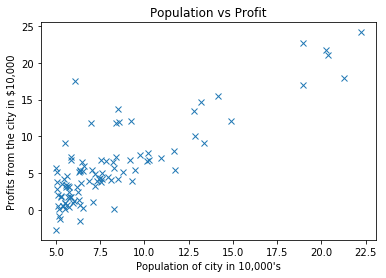

In [6]:
fig, ax = plt.subplots()
ax.plot(X,Y,ls='', marker = 'x', label='Population vs Profit')
ax.set(xlabel="Population of city in 10,000's", ylabel="Profits from the city in $10,000", title='Population vs Profit')

Converting data into matrices as adding column of ones to X

In [7]:
X = np.matrix(X)
Y = np.matrix(Y)
m,n = X.shape
X_new = np.hstack((np.ones((m,1)),X))
n = n+1

Let us take, theta initially as zeros and set learning rate (alpha) and number of iterations

In [8]:
initialTheta = np.zeros((n,1))    
alpha = 0.01    #Learning rate
iterations = 1500

Cost when initial parameters are zero.

In [9]:
print("Cost when theta is\n",initialTheta,"\nis: ",costFunction(initialTheta,X_new,Y))

Cost when theta is
 [[0.]
 [0.]] 
is:  32.072733877455676


Running Gradient Descent:

In [10]:
finalTheta = gradientDescent(initialTheta,X_new,Y,alpha,iterations)
print("Optimized parameters after running gradient Descent are: \n",finalTheta)

Optimized parameters after running gradient Descent are: 
 [[-3.63029144]
 [ 1.16636235]]


Cost after running Gradient Descent:

In [11]:
print("Cost after running gradient Descent is: ",costFunction(finalTheta,X_new,Y))

Cost after running gradient Descent is:  4.483388256587725


Linear fit after obtaining the values of theta:

[Text(0, 0.5, 'Profits from the city in $10,000'),
 Text(0.5, 0, "Population of city in 10,000's"),
 Text(0.5, 1.0, 'Population vs Profit')]

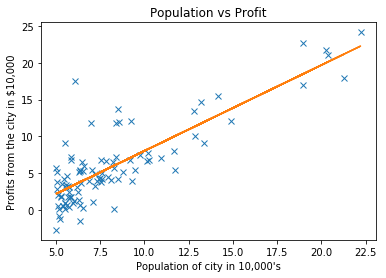

In [12]:
fig, ax = plt.subplots()
ax.plot(X,Y,ls='', marker = 'x', label='Population vs Profit')
ax.plot(X,hypothesis(finalTheta,X_new))
ax.set(xlabel="Population of city in 10,000's", ylabel="Profits from the city in $10,000", title='Population vs Profit')

Predicting profits for given population using our model:

In [13]:
print("Profits in $10,000's when the city population is 35,000: ",[1, 3.5]*finalTheta)
print("Profits in $10,000's when the city population is 70,000: ",[1, 7]*finalTheta)

Profits in $10,000's when the city population is 35,000:  [[0.45197679]]
Profits in $10,000's when the city population is 70,000:  [[4.53424501]]


<br>

<center>
    <h1>Linear Regreesion with multivariable</h1>
</center>

<p>
    Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.
</p>

<b>Note: <i>hypothesis, costFunction, gradientDescent</i> are same as above. 

Feature Normalization:

In [14]:
def featureNormalization(X):
    m, n = X.shape
    means = []
    stds = []
    for column in range(1,n):
        mean = X[:,column].mean()
        std = X[:,column].std()
        means.append(mean)
        stds.append(std)
        X[:,column] = (X[:,column] - mean)/std
    return X, means, stds

In [15]:
def predict(X,theta,means,stds):
    X = np.matrix(X)
    m,n = X.shape
    for column in range(1,n):
        X[0:,column] = (X[0:,column] - means[column-1])/stds[column-1]
    return X@theta

Loading Data:

In [16]:
data = np.loadtxt("Data/ex1data2.txt", delimiter=',')
X =  data[:,:-1]
Y =  data[:,-1:]

Converting data into matrices, adding column of ones to X and normalizing features:

In [17]:
X = np.matrix(X)
Y = np.matrix(Y)
m,n = X.shape
X_new = np.hstack((np.ones((m,1)),X))
X_new,means,stds = featureNormalization(X_new)
n = n+1

Intializing theta, learning rate and number of iterations:

In [18]:
initialTheta = np.zeros((n,1))    
alpha = 0.01    #Learning rate
iterations = 400

Cost when initial parameters are zero.

In [19]:
print("Cost when theta is\n",initialTheta,"\nis: ",costFunction(initialTheta,X_new,Y))

Cost when theta is
 [[0.]
 [0.]
 [0.]] 
is:  65591548106.45744


Running Gradient Descent:

In [20]:
finalTheta = gradientDescent(initialTheta,X_new,Y,alpha,iterations)
print("Optimized parameters after running gradient Descent are: \n",finalTheta)

Optimized parameters after running gradient Descent are: 
 [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


Cost after running Gradient Descent:

In [21]:
print("Cost after running gradient Descent is: ",costFunction(finalTheta,X_new,Y))

Cost after running gradient Descent is:  2105448288.6292472


Predicting cost of the houses using our model:

In [22]:
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ",predict([1.,1650.,3.],finalTheta,means,stds).item())

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):  289221.5473712181


<br>

<center>
    <h1>Normal equation Method</h1>
 </center>

In [23]:
def normalEqn(X,y):
    return pinv(X.T@X)@X.T@y

Loading Data

In [24]:
data = np.loadtxt("Data/ex1data2.txt", delimiter=',')
X =  data[:,:-1]
Y =  data[:,-1:]

In [25]:
X = np.matrix(X)
Y = np.matrix(Y)
m,n = X.shape
X_new = np.hstack((np.ones((m,1)),X))
n = n+1

Applying normal equation to get theta

In [26]:
theta = normalEqn(X_new,Y)

Predicting values:

In [27]:
print("Predicted price of a 1650 sq-ft, 3 br house (using normal eqn): ",[1.,1650.,3.]*theta)

Predicted price of a 1650 sq-ft, 3 br house (using normal eqn):  [[293081.46433497]]
